Aim: Create a deep multi-layer neural network to classify self generated random data.


In [12]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [13]:
epochs = 200
batch_size = 50

In [14]:
samples = 5000

yTrain = (torch.arange(samples,dtype = torch.float32).reshape(-1,1) % 2)

stddev = 0.15

xTrain = torch.randn(samples,3)*stddev + yTrain


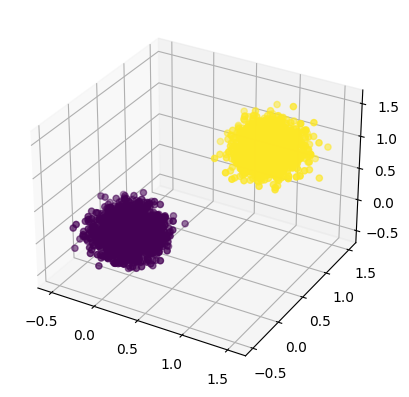

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xTrain[:, 0], xTrain[:, 1], xTrain[:, 2], c=yTrain, cmap='viridis')
plt.show()

In [16]:
#create model architecture
class ANN(nn.Module):
  def __init__(self):
    super().__init__()
    self.activation = nn.Sigmoid()
    self.l1 = nn.Linear(3,2)
    self.l2 = nn.Linear(2,1)

  def forward(self,x):
    out1 = self.activation(self.l1(x))
    out = self.activation(self.l2(out1))
    return out

In [17]:
model = ANN()
print(model)

ANN(
  (activation): Sigmoid()
  (l1): Linear(in_features=3, out_features=2, bias=True)
  (l2): Linear(in_features=2, out_features=1, bias=True)
)


In [18]:
criteria = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

In [19]:
lossHist = []
epHist = []

steps = len(xTrain)
for e in range(epochs):
  for i in range(0,steps,batch_size):
    xBatch = xTrain[i:i+batch_size]
    yBatch = yTrain[i:i+batch_size]
    output = model(xBatch)
    loss = criteria(output,yBatch)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  lossHist.append(loss.item())
  epHist.append(e)
  if e % 10 == 0:
    print(f"Epoch: {e} Loss: {loss.item()}")

Epoch: 0 Loss: 0.6964328289031982
Epoch: 10 Loss: 0.3572392165660858
Epoch: 20 Loss: 0.14852531254291534
Epoch: 30 Loss: 0.07503960281610489
Epoch: 40 Loss: 0.042507484555244446
Epoch: 50 Loss: 0.025611020624637604
Epoch: 60 Loss: 0.015977907925844193
Epoch: 70 Loss: 0.010174784809350967
Epoch: 80 Loss: 0.006560612469911575
Epoch: 90 Loss: 0.004263185430318117
Epoch: 100 Loss: 0.0027840090915560722
Epoch: 110 Loss: 0.001823882106691599
Epoch: 120 Loss: 0.0011974215740337968
Epoch: 130 Loss: 0.0007872865535318851
Epoch: 140 Loss: 0.000518143002409488
Epoch: 150 Loss: 0.00034125347156077623
Epoch: 160 Loss: 0.00022488021932076663
Epoch: 170 Loss: 0.00014824667596258223
Epoch: 180 Loss: 9.776466322364286e-05
Epoch: 190 Loss: 6.448714702855796e-05


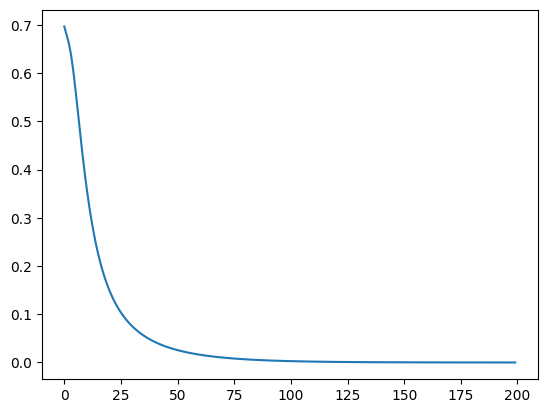

In [20]:
fg = plt.figure()
plt.plot(epHist, lossHist)
fg.show()

In [21]:
#test
with torch.no_grad():
  xTest = torch.tensor([.9,.9,.9])
  xTest = xTest.reshape(-1,3)
  out = model(xTest)
  print(out)
  print(" For input 0.9,0.9,0.9\nExpected value: Class 1")
  print(f"Predicted value: Class {round(out.item())}")

tensor([[1.0000]])
 For input 0.9,0.9,0.9
Expected value: Class 1
Predicted value: Class 1


In [22]:
#test
with torch.no_grad():
  xTest = torch.tensor([.4,.4,.4])
  xTest = xTest.reshape(-1,3)
  out = model(xTest)
  print(out)
  print(" For input 0.4,0.4,0.4\nExpected value: Class 0")
  print(f"Predicted value: Class {round(out.item())}")

tensor([[0.0072]])
 For input 0.4,0.4,0.4
Expected value: Class 0
Predicted value: Class 0
